In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
data = pd.read_csv('laliga_2324.csv')

In [243]:
data.shape

(3611, 150)

In [244]:
data.head()

,competition,player.url,id,slug,name,nickname,firstname,lastname,gender,date_of_birth,...,unsuccessful_crosses_open_play,unsuccessful_dribbles,unsuccessful_launches,unsuccessful_layoffs,unsuccessful_long_passes,unsuccessful_passes_opposition_half,unsuccessful_passes_own_half,unsuccessful_short_passes,winning_goal,yellow_cards
0,Classics,https://www.laliga.com/en-ES/player/aaron,1307,aaron,Aarón Escandell,Aarón,Aarón,Escandell,male,1995-09-27T00:00:00+00:00,...,NaN,NaN,11.0,NaN,21.0,14.0,7.0,NaN,0.0,NaN
1,Classics,https://www.laliga.com/en-ES/player/abdessamad...,13770,abdessamad-ezzalzouli,Abde Ezzalzouli,Ez Abde,Abde,Ezzalzouli,male,2001-12-17T00:00:00+00:00,...,30.0,23.0,2.0,5.0,8.0,93.0,25.0,78.0,NaN,1.0
2,Classics,https://www.laliga.com/en-ES/player/abdellah-r...,32823,abdellah-raihani,Abde Raihani,Abde,Abde,Raihani,male,2004-02-03T00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,Classics,https://www.laliga.com/en-ES/player/abderrahma...,27754,abderrahman-rebbach,Abde Rebbach,A. Rebbach,Abde,Rebbach,male,1998-08-11T00:00:00+00:00,...,36.0,16.0,3.0,2.0,7.0,86.0,13.0,42.0,1.0,1.0
4,Classics,https://www.laliga.com/en-ES/player/abqar,8715,abqar,Abdel Abqar,A. Abqar,Abdel,Abqar,male,1999-03-10T00:00:00+00:00,...,2.0,1.0,57.0,NaN,137.0,155.0,51.0,67.0,0.0,10.0


In [245]:
np.array(data.columns).T

array(['competition', 'player.url', 'id', 'slug', 'name', 'nickname',
       'firstname', 'lastname', 'gender', 'date_of_birth',
       'place_of_birth', 'weight', 'height', 'international', 'twitter',
       'instagram', 'country', 'team', 'team.shortname',
       'team.foundation', 'team.shield', 'shirt_number', 'position',
       'photo', 'stadium', 'stadium.image', 'aerial_duels',
       'aerial_duels_lost', 'aerial_duels_won', 'appearances',
       'assists_intentional', 'attempts_from_set_pieces', 'away_goals',
       'backward_passes', 'blocked_shots', 'blocks', 'catches',
       'clean_sheets', 'clearances_off_the_line',
       'corners_taken_incl_short_corners', 'corners_won',
       'crosses_not_claimed', 'drops', 'duels', 'duels_lost', 'duels_won',
       'forward_passes', 'foul_attempted_tackle', 'foul_won_penalty',
       'games_played', 'gk_successful_distribution',
       'gk_unsuccessful_distribution', 'goal_assists', 'goal_kicks',
       'goalkeeper_smother', 'goals', 

In [246]:
#Laliga teams only
data['team'].unique()

array(['UD Las Palmas', 'Real Betis', 'Atlético de Madrid',
       'Deportivo Alavés', 'Rayo Vallecano', 'RCD Mallorca',
       'Villarreal CF', 'Sevilla FC', 'UD Almería', 'Granada CF', nan,
       'Cádiz CF', 'Real Sociedad', 'CA Osasuna', 'Athletic Club',
       'Valencia CF', 'Getafe CF', 'Girona FC', 'FC Barcelona',
       'Real Valladolid CF', 'Real Madrid', 'Brighton', 'Elche CF',
       'Sheffield Utd', 'Bayer 04', 'FC Bayern', 'RC Celta',
       'Villarreal B', 'CD Mirandés', 'CD Leganés', 'Bournemouth',
       'Nottingham Forest', 'VfL Bochum', 'SD Huesca', 'FC Andorra',
       'Albacete BP', 'Real Zaragoza', 'AD Alcorcón', 'Milan', 'Nice',
       'Levante UD', 'Monza', 'Lyon', 'SD Eibar',
       'RCD Espanyol de Barcelona', 'Wolves', 'Reims',
       'US Salernitana 1919'], dtype=object)

In [247]:
data['team'].value_counts()

Sevilla FC                   194
RC Celta                     175
Real Madrid                  175
Deportivo Alavés             175
Granada CF                   175
FC Barcelona                 170
Real Sociedad                170
Cádiz CF                     165
Real Betis                   160
Getafe CF                    160
Atlético de Madrid           159
Valencia CF                  155
RCD Mallorca                 150
UD Las Palmas                149
UD Almería                   145
Athletic Club                145
Girona FC                    145
Villarreal CF                144
CA Osasuna                   140
Rayo Vallecano               130
Villarreal B                  25
Real Valladolid CF            25
CD Mirandés                   20
CD Leganés                    15
Sheffield Utd                 10
Elche CF                      10
Wolves                         5
Reims                          5
AD Alcorcón                    5
RCD Espanyol de Barcelona      5
SD Eibar  

In [248]:
#We remove teams with counts < 30 as these are not part of laliga 2023/24. These can be verified online. 
#The players from these teams would possibly have being transferred from previous laliga team 
teams_to_remove = data['team'].value_counts().index[data['team'].value_counts()< 30]
updated_data = data[~data['team'].isin(teams_to_remove)]

In [249]:
updated_data['team'].unique()

array(['UD Las Palmas', 'Real Betis', 'Atlético de Madrid',
       'Deportivo Alavés', 'Rayo Vallecano', 'RCD Mallorca',
       'Villarreal CF', 'Sevilla FC', 'UD Almería', 'Granada CF', nan,
       'Cádiz CF', 'Real Sociedad', 'CA Osasuna', 'Athletic Club',
       'Valencia CF', 'Getafe CF', 'Girona FC', 'FC Barcelona',
       'Real Madrid', 'RC Celta'], dtype=object)

In [250]:
#Dropping columns not used for analysis. 
updated_data = updated_data.drop(columns =['player.url', 'slug', 'gender', 'place_of_birth','twitter', 'instagram',
                            'team.shortname','team.foundation', 'team.shield','photo', 'stadium', 'stadium.image',
                            'firstname', 'lastname', 'nickname', 
                           ] )
updated_data.shape

(3401, 135)

In [251]:
#We create an AGE column and use it instead of DOB
#The AGE is calculated at the start of season which is a common practice
# Start date for Laliga season 2023/24 was 11th Aug, 2023

from datetime import datetime
start_date = datetime(2023,8,11)

updated_data['date_of_birth'] = pd.to_datetime(updated_data['date_of_birth'])
updated_data['Age'] = (start_date.year - updated_data['date_of_birth'].dt.year) - (((start_date.month < updated_data['date_of_birth'].dt.month)*1) & ((start_date.day < updated_data['date_of_birth'].dt.day)*1))
updated_data = updated_data.drop(columns = 'date_of_birth')


In [252]:
#We now check if players are repeated in the dataset
updated_data['id'].value_counts()
#Draw plots to verify

1307     5
1097     5
3861     5
2019     5
16645    5
        ..
19264    5
1882     4
30405    4
35498    4
5888     4
Name: id, Length: 681, dtype: int64

In [253]:
#Each player is repeated either 4 or 5 times.
#Upon inspection, we see that the rows for players are repeated under all columns for each competetion type
#We remove the competition column and remove duplicate player rows
updated_data = updated_data.drop(columns = 'competition')

#check for unique ids
print('Number of unique ids is:',updated_data['id'].unique().shape[0])

#Remove duplicate player rows
updated_data = updated_data[~updated_data.duplicated('id')]
print('Rows after removing duplicates', updated_data.shape[0] )

Number of unique ids is: 681
Rows after removing duplicates 681


In [254]:
updated_data.shape

(681, 134)

In [255]:
nulls = pd.DataFrame(updated_data.isnull().sum(), columns = ['Null Count']).T
nulls

,id,name,weight,height,international,country,team,shirt_number,position,aerial_duels,...,unsuccessful_dribbles,unsuccessful_launches,unsuccessful_layoffs,unsuccessful_long_passes,unsuccessful_passes_opposition_half,unsuccessful_passes_own_half,unsuccessful_short_passes,winning_goal,yellow_cards,Age
Null Count,0,0,137,36,0,1,44,44,44,182,...,263,233,493,195,163,175,179,157,253,0


In [256]:
cleaned_data = updated_data.copy()

In [257]:
#We replace weight and height with thier averages
weight, height = cleaned_data['weight'].mean(), cleaned_data['height'].mean()
cleaned_data['weight'].fillna(value = weight, inplace = True)
cleaned_data['height'].fillna(value = height, inplace = True)

In [258]:
#We inspect the null values under position
cleaned_data[cleaned_data['position'].isnull()].head()

,id,name,weight,height,international,country,team,shirt_number,position,aerial_duels,...,unsuccessful_dribbles,unsuccessful_launches,unsuccessful_layoffs,unsuccessful_long_passes,unsuccessful_passes_opposition_half,unsuccessful_passes_own_half,unsuccessful_short_passes,winning_goal,yellow_cards,Age
16,7627,Agustín Marchesín,82.000000,188.00000,True,AR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
31,6160,Alberto Perea,74.000000,177.00000,False,ES,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
33,8732,Alberto Soro,64.000000,173.00000,False,ES,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
44,31792,Alejandro González Gorrin,74.533088,182.04031,False,ES,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
61,719,Andrés Guardado,60.000000,169.00000,True,MX,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36


In [259]:
#The stats under the players will null position are empty. We drop these players
cleaned_data = cleaned_data.dropna(subset = 'position')
cleaned_data.shape

(637, 134)

In [260]:
#Replacing the null in country with Unknown
cleaned_data['country'].fillna(value = 'Unknown', inplace = True)

In [261]:
#The stat columns are null as the player doesn't have any contribution for that particular stat
#These can be imputed using value 0
#Eg: A player has null value for tackles, this can be interpreted as 0 tackles made
#The stat columns begin from 10th column onwards
cols = cleaned_data.columns
stat_cols = cols[9:]

for col in stat_cols:
    cleaned_data[col].fillna(value = 0, inplace = True)   

In [262]:
nulls = pd.DataFrame(cleaned_data.isnull().sum(), columns = ['Null Count']).T
nulls

,id,name,weight,height,international,country,team,shirt_number,position,aerial_duels,...,unsuccessful_dribbles,unsuccessful_launches,unsuccessful_layoffs,unsuccessful_long_passes,unsuccessful_passes_opposition_half,unsuccessful_passes_own_half,unsuccessful_short_passes,winning_goal,yellow_cards,Age
Null Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
nulls.T.sum()

Null Count    0
dtype: int64

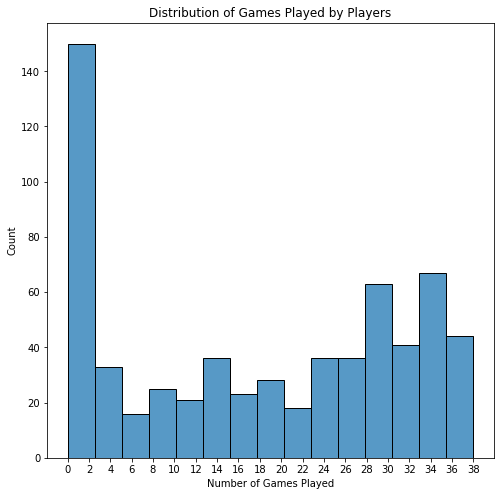

In [264]:
#In order to perform analysis we need to remove 'outlier players', those who have played few games and minutes
#Lets see the distribution of games played and timw played for each player
plt.figure(figsize = (8,8))
sns.histplot(data = cleaned_data['games_played'], bins = 15);
plt.xlabel('Number of Games Played')
plt.xticks(np.arange(0,40,2))
plt.title('Distribution of Games Played by Players');

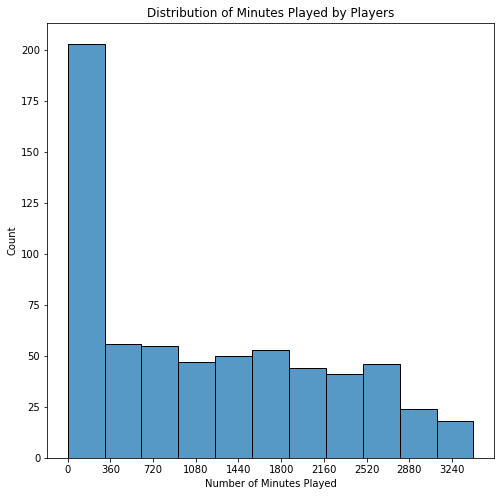

In [265]:
plt.figure(figsize = (8,8))
sns.histplot(data = cleaned_data['time_played']);
plt.xlabel('Number of Minutes Played')
plt.xticks(np.arange(0,3420,360))
plt.title('Distribution of Minutes Played by Players');

In [266]:
#Laliga and sport leagues generally have a criteria to filter players for conducting analysis, and we will use the same
#We will consider players who have played 900 minutes (equivalent to 1o full matches)

In [267]:
cleaned_data[cleaned_data['time_played'] > 899]['time_played'].describe()

count     331.000000
mean     1977.978852
std       658.398592
min       900.000000
25%      1440.000000
50%      1917.000000
75%      2502.500000
max      3420.000000
Name: time_played, dtype: float64

In [268]:
cleaned_data = cleaned_data[cleaned_data['time_played'] >= 899]
cleaned_data.shape

(331, 134)

In [269]:
#A sepearate analysis for goalkeepers, hence we created a dataset with goalkeepes only
gk = cleaned_data[cleaned_data['position'] == 'Goalkeeper']
gk.head()

,id,name,weight,height,international,country,team,shirt_number,position,aerial_duels,...,unsuccessful_dribbles,unsuccessful_launches,unsuccessful_layoffs,unsuccessful_long_passes,unsuccessful_passes_opposition_half,unsuccessful_passes_own_half,unsuccessful_short_passes,winning_goal,yellow_cards,Age
57,6724,Andrii Lunin,80.0,191.0,False,UA,Real Madrid,13.0,Goalkeeper,10.0,...,0.0,49.0,0.0,79.0,45.0,39.0,5.0,0.0,2.0,24
72,1290,Antonio Sivera,75.0,184.0,False,ES,Deportivo Alavés,1.0,Goalkeeper,8.0,...,0.0,181.0,0.0,443.0,380.0,67.0,4.0,0.0,3.0,27
87,4225,Augusto Batalla,87.0,186.0,False,AR,Granada CF,25.0,Goalkeeper,3.0,...,0.0,122.0,0.0,237.0,209.0,33.0,5.0,0.0,3.0,27
131,14864,Conan Ledesma,70.0,187.0,False,AR,Cádiz CF,1.0,Goalkeeper,10.0,...,0.0,180.0,0.0,485.0,444.0,44.0,3.0,0.0,0.0,30
167,1669,David Soria,85.0,192.0,False,ES,Getafe CF,13.0,Goalkeeper,4.0,...,0.0,241.0,0.0,595.0,530.0,72.0,7.0,0.0,3.0,30


In [270]:
players = cleaned_data.drop(columns = ['gk_successful_distribution', 'gk_unsuccessful_distribution', 'catches', 'goalkeeper_smother',
                                      'punches', 'putthrough_blocked_distribution', 'putthrough_blocked_distribution_won','saves_from_penalty', 
                                       'saves_made', 'saves_made_caught', 'saves_made_from_inside_box', 'saves_made_from_outside_box',
                                       'saves_made_parried'])
players = players[players['position'] != 'Goalkeeper']
players.shape

(307, 121)

Various analysis can be performed on the above 2 datesets, to get different statistics like
top scorer, most saves, most cleansheets and so on.

Since players play at different positions, it will be meaning full to categorize them  as per position and then conduct the
analysis. This is because each position have distinct roles and skill sets and combining these diverse metrics in a single PCA
might obscure patterns specific to each position

In [271]:
defender = players[players['position'] == 'Defender']
midfielder = players[players['position'] == 'Midfielder']
forward = players[players['position'] == 'Forward']

In [272]:
defender_analysis = defender.drop(columns = ['id', 'international', 'country', 'team', 'shirt_number', 'position'])
midfielder_analysis = midfielder.drop(columns = ['id', 'international', 'country', 'team', 'shirt_number', 'position'])
forward_analysis = forward.drop(columns = ['id', 'international', 'country', 'team', 'shirt_number', 'position'])

In [273]:
#Update the name column as index
defender_analysis = defender_analysis.set_index('name')
midfielder_analysis = midfielder_analysis.set_index('name')
forward_analysis = forward_analysis.set_index('name')

### PCA for Defenders

In [274]:
#We will conduct defenderanalysis
#We will keep statistics relevant to forwards as including irrelevant statistics 
#can introduce noise and obscure meaningful patterns

def_columns_to_keep = ['weight', 'height', 'aerial_duels', 'aerial_duels_lost',
       'aerial_duels_won', 'appearances', 'assists_intentional','backward_passes',
       'blocked_shots', 'blocks', 'clean_sheets',
       'clearances_off_the_line','duels',
       'duels_lost', 'duels_won', 'forward_passes',
       'foul_attempted_tackle','goals', 'goals_conceded','goal_assists',
       'goals_conceded_inside_box', 'goals_conceded_outside_box',
       'goals_from_inside_box', 'goals_from_outside_box', 'ground_duels',
       'ground_duels_lost', 'ground_duels_won', 'handballs_conceded',
       'headed_goals','interceptions','last_player_tackle','leftside_passes',
        'open_play_passes','own_goal_scored', 'penalties_conceded','penalty_goals_conceded', 'recoveries',
       'red_cards_2nd_yellow','rightside_passes',
        'set_pieces_goals', 'starts', 'straight_red_cards', 'substitute_off', 'substitute_on', 'successful_dribbles',
       'successful_launches', 'successful_layoffs',
       'successful_long_passes', 'successful_open_play_passes',
       'successful_passes_opposition_half', 'successful_passes_own_half',
       'successful_short_passes', 'tackles_lost', 'tackles_won',
        'through_balls','time_played', 'times_tackled', 'total_clearances',
       'total_fouls_conceded', 'total_fouls_won',
       'total_losses_of_possession', 'total_passes', 'total_red_cards','touches','yellow_cards']

In [275]:
from sklearn.preprocessing import StandardScaler
def_scaler = StandardScaler()


defender_analysis = defender_analysis[def_columns_to_keep]
cols = defender_analysis.columns
d_index = defender_analysis.index


defender_analysis = def_scaler.fit_transform(defender_analysis)
defender_analysis = pd.DataFrame(defender_analysis, columns = cols, index = d_index)

In [276]:
defender_analysis.head()

,weight,height,aerial_duels,aerial_duels_lost,aerial_duels_won,appearances,assists_intentional,backward_passes,blocked_shots,blocks,...,time_played,times_tackled,total_clearances,total_fouls_conceded,total_fouls_won,total_losses_of_possession,total_passes,total_red_cards,touches,yellow_cards
name,,,,,,,,,,,,,,,,,,,,,
Abdel Abqar,0.830495,0.981109,0.432268,0.787557,0.196333,0.057757,-0.700083,-0.850487,-0.303127,2.190769,...,0.561770,-0.888883,1.235320,0.982153,0.469245,-0.247355,-0.609725,-0.475739,-0.673726,1.982382
Abdul Mumin,0.667527,0.981109,0.344727,0.480345,0.239395,-1.051708,-0.700083,-0.441853,-0.664429,1.196497,...,-0.454421,-0.764975,0.452074,-0.820866,-0.115365,-0.788910,-0.578951,1.529162,-0.829800,0.023244
Abner Vinícius da Silva Santos,0.015654,0.010962,-1.085122,-1.286126,-0.880213,-0.576223,-0.700083,-0.381315,0.058176,-0.792047,...,-0.943638,-0.021526,-0.499011,-0.720698,-1.284586,-0.331390,-0.926258,-0.475739,-0.799713,-0.760411
Adrià Pedrosa,-0.962155,-0.959185,-0.851677,-0.364489,-1.052461,0.691736,2.224158,0.905125,0.419478,-0.650008,...,-0.365771,1.527325,-0.890635,-1.722375,1.220888,0.695697,-0.805360,-0.475739,-0.320210,-1.544067
Aihen Muñoz,-1.125123,-1.120876,-0.618233,-0.748504,-0.492657,-0.893213,0.030977,-0.517526,-0.664429,-0.365931,...,-1.398379,-0.083480,-0.946581,-0.620531,-0.783491,-0.210007,-1.152668,-0.475739,-1.038524,-1.152239


In [277]:
from sklearn.decomposition import PCA
pca_defenders = PCA(n_components = 10)

In [278]:
d_results = pca_defenders.fit(defender_analysis)
pc_loadings = pd.DataFrame(d_results.components_.T, index = cols)
new_col_names = {i: f'PC_{i+1}' for i in range(pc_loadings.shape[1])}
pc_loadings.rename(columns = new_col_names, inplace = True )

In [279]:
pc_loadings.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
weight,0.024554,-0.182784,-0.044347,0.096875,0.103638,0.254636,-0.165254,-0.142245,-0.081497,0.078866
height,0.021225,-0.201522,-0.083744,0.047482,-0.017362,0.136232,-0.194700,-0.247393,0.030464,0.021043
aerial_duels,0.132420,-0.190327,-0.101429,0.118101,0.007591,-0.034178,-0.090399,-0.020166,-0.026360,0.053001
aerial_duels_lost,0.146560,-0.141256,-0.142753,0.040601,-0.000999,-0.056585,-0.019006,0.071463,-0.047131,0.057362
aerial_duels_won,0.113239,-0.201667,-0.069641,0.151518,0.011762,-0.018711,-0.122745,-0.069827,-0.012475,0.046051


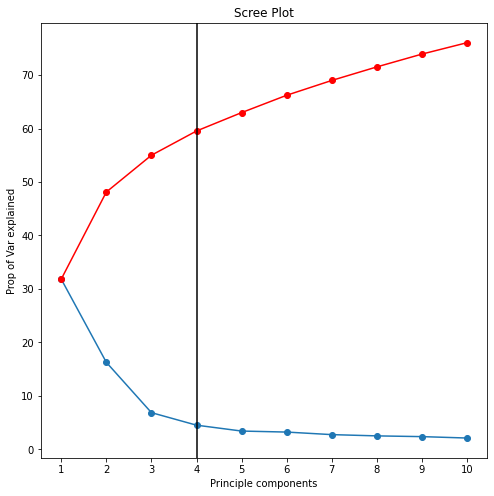

In [280]:
#Scree plot
exp_var = d_results.explained_variance_ratio_*100
cum_var = np.cumsum(d_results.explained_variance_ratio_*100)

plt.figure(figsize = (8,8))
plt.plot(np.arange(1,11), exp_var, 'o-')
plt.plot(np.arange(1,11), cum_var, 'ro-')
plt.xlabel('Principle components')
plt.ylabel('Prop of Var explained')
plt.title('Scree Plot')
plt.xticks(np.arange(1,11))
plt.axvline(x = 4, color = 'black');

In [281]:
print('The % of variance explained by 4 PCs is', round(cum_var[3]))

The % of variance explained by 4 PCs is 60


In [282]:
pd.set_option('display.max_rows', pc_loadings.shape[0]+1)
pd.DataFrame(pc_loadings['PC_1'].sort_values(ascending = False))

,PC_1
time_played,0.206885
starts,0.204100
touches,0.202968
recoveries,0.196023
duels,0.194648
duels_won,0.193598
appearances,0.182719
open_play_passes,0.181468
total_passes,0.181316
forward_passes,0.179620


In [283]:
pd.DataFrame(pc_loadings['PC_2'].sort_values(ascending = False))

,PC_2
times_tackled,0.256173
successful_dribbles,0.223178
ground_duels_lost,0.220544
ground_duels,0.215779
goal_assists,0.198100
ground_duels_won,0.196913
assists_intentional,0.193650
backward_passes,0.185599
substitute_off,0.173578
total_losses_of_possession,0.172635


In [284]:
pd.DataFrame(pc_loadings['PC_3'].sort_values(ascending = False))

,PC_3
successful_passes_opposition_half,0.271257
successful_short_passes,0.246385
successful_open_play_passes,0.238373
backward_passes,0.212664
open_play_passes,0.205310
total_passes,0.200511
successful_layoffs,0.184697
through_balls,0.178075
successful_passes_own_half,0.169867
rightside_passes,0.165860


In [285]:
pd.DataFrame(pc_loadings['PC_4'].sort_values(ascending = False))

,PC_4
goals_from_inside_box,0.490837
goals,0.487250
headed_goals,0.434450
aerial_duels_won,0.151518
foul_attempted_tackle,0.134157
successful_layoffs,0.120834
aerial_duels,0.118101
clearances_off_the_line,0.117750
blocked_shots,0.107084
weight,0.096875


Analysis using the 4 loadings above is present in the readme file on github.

In [286]:
#computing pc scores
scores = pca_defenders.fit_transform(defender_analysis)

scores = pd.DataFrame(scores[:,0:4], index = d_index, columns = ['PC1score', 'PC2score', 'PC3score' , 'PC4score'])
scores.head()

,PC1score,PC2score,PC3score,PC4score
name,,,,
Abdel Abqar,0.665254,-2.649606,-4.288282,-1.386529
Abdul Mumin,-3.442114,-3.145004,-0.182105,0.217104
Abner Vinícius da Silva Santos,-4.809707,0.753160,0.239595,-0.679146
Adrià Pedrosa,-1.748611,4.955697,0.006633,0.117679
Aihen Muñoz,-5.386280,1.532791,-0.509697,-0.180822


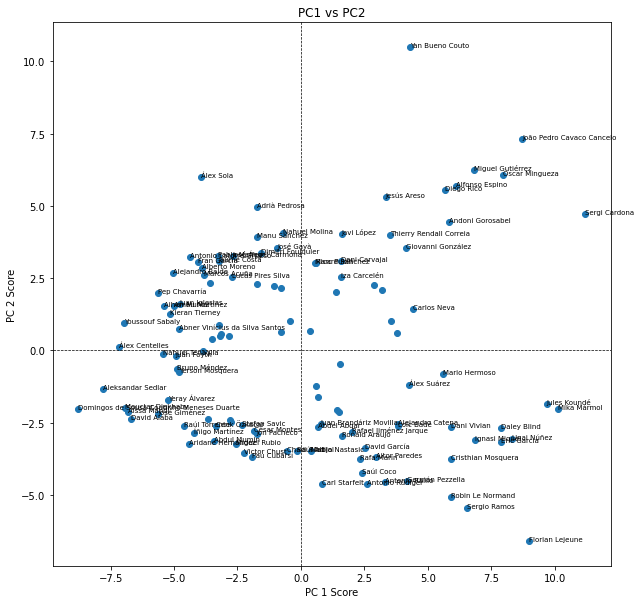

In [287]:
#Plotting PC1 vs PC2
xvar = scores['PC1score']
yvar = scores['PC2score']

fig, ax = plt.subplots(figsize = (10,10))

# Scatter plot using plot()
ax.scatter(xvar, yvar)  # 'ko' represents black dots

# Add labels using text()
for i, label in enumerate(d_index):
       if abs(xvar[i]) > 4 or abs(yvar[i]) > 2.5:
        ax.text(xvar[i], yvar[i], label, fontsize = 7)

ax.axhline(0, color = 'black', linewidth = 0.7, linestyle='--')  # Horizontal line at y=0
ax.axvline(0, color = 'black', linewidth = 0.7, linestyle='--') 
plt.xlabel('PC 1 Score')
plt.ylabel('PC 2 Score')
plt.title('PC1 vs PC2')
plt.show()

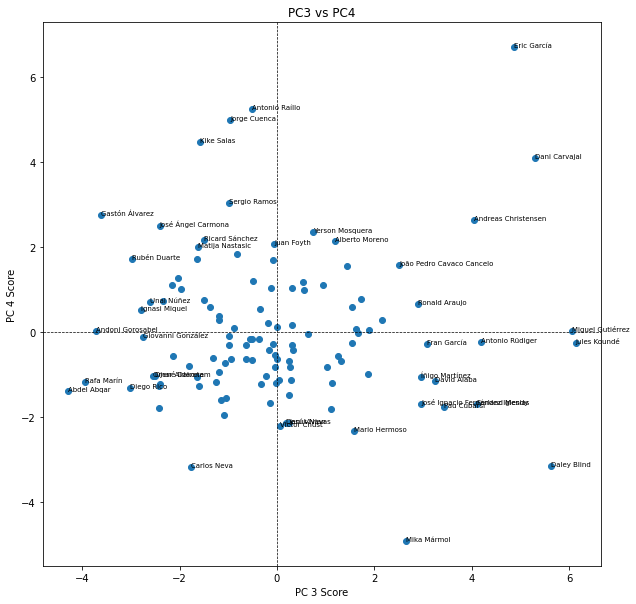

In [288]:
#Plotting PC3 vs PC4
xvar = scores['PC3score']
yvar = scores['PC4score']

fig, ax = plt.subplots(figsize = (10,10))

# Scatter plot using plot()
ax.scatter(xvar, yvar)  # 'ko' represents black dots

# Add labels using text()
for i, label in enumerate(d_index):
       if abs(xvar[i]) > 2.5 or abs(yvar[i]) > 2:
        ax.text(xvar[i], yvar[i], label, fontsize = 7)

ax.axhline(0, color = 'black', linewidth = 0.7, linestyle='--')  # Horizontal line at y=0
ax.axvline(0, color = 'black', linewidth = 0.7, linestyle='--') 
plt.xlabel('PC 3 Score')
plt.ylabel('PC 4 Score')
plt.title('PC3 vs PC4')
plt.show()

Aggregating defensive performances across teams

In [289]:
defender = defender.set_index('name')
scores['team'] = scores.index.map(defender['team'])
scores['time_played'] = scores.index.map(defender['time_played'])
scores.head()

,PC1score,PC2score,PC3score,PC4score,team,time_played
name,,,,,,
Abdel Abqar,0.665254,-2.649606,-4.288282,-1.386529,Deportivo Alavés,2314.0
Abdul Mumin,-3.442114,-3.145004,-0.182105,0.217104,Rayo Vallecano,1695.0
Abner Vinícius da Silva Santos,-4.809707,0.753160,0.239595,-0.679146,Real Betis,1397.0
Adrià Pedrosa,-1.748611,4.955697,0.006633,0.117679,Sevilla FC,1749.0
Aihen Muñoz,-5.386280,1.532791,-0.509697,-0.180822,Real Sociedad,1120.0


In [290]:
#Define weighted average function
def weighted_avg(team, val):
    score = team[val]
    weight = team['time_played']
    
    return (score*weight).sum()/weight.sum()

In [291]:
teams = pd.DataFrame()

for col in scores.columns[0:4]:  # Adjust range based on your actual columns
    # Calculate weighted average for each column
    results = scores.groupby('team').apply(weighted_avg, val=col).reset_index(name=f'{col}')
    
    # Set index and concatenate results into teams DataFrame
    results.set_index('team', inplace=True)
    teams = pd.concat([teams, results], axis=1)
    
teams    

,PC1score,PC2score,PC3score,PC4score
team,,,,
Athletic Club,1.646369,-0.725763,0.996531,-0.795209
Atlético de Madrid,-0.324375,-0.113209,0.961512,-0.643447
CA Osasuna,1.114648,-0.381353,-0.680166,-0.608576
Cádiz CF,0.114591,-0.396740,-1.415360,-1.129481
Deportivo Alavés,0.513656,0.948657,-2.788496,-0.108816
FC Barcelona,2.999908,0.025853,3.645412,0.310859
Getafe CF,1.334515,1.350088,-2.454752,0.082672
Girona FC,5.646828,2.314568,4.471768,0.695575
Granada CF,1.543229,-0.556844,-1.833966,-0.001790


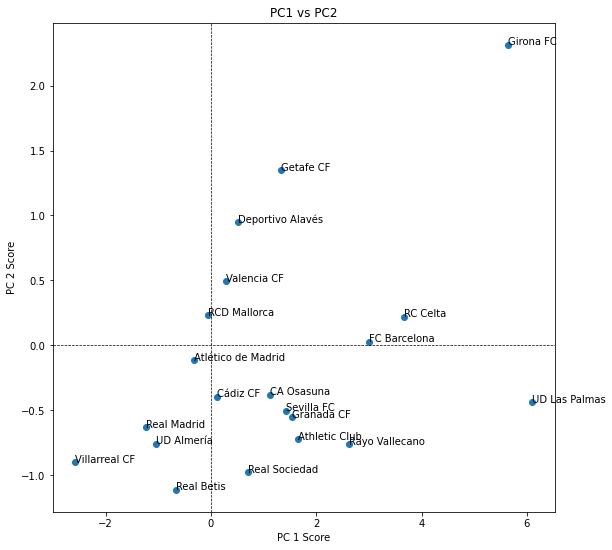

In [292]:
#Plotting PC1 vs PC2
xvar = teams['PC1score']
yvar = teams['PC2score']
team_index = teams.index
fig, ax = plt.subplots(figsize = (9,9))

# Scatter plot using plot()
ax.scatter(xvar, yvar)  # 'ko' represents black dots

# Add labels using text()
for i, label in enumerate(team_index):
        ax.text(xvar[i], yvar[i], label, fontsize = 10)

ax.axhline(0, color = 'black', linewidth = 0.7, linestyle='--')  # Horizontal line at y=0
ax.axvline(0, color = 'black', linewidth = 0.7, linestyle='--') 
plt.xlabel('PC 1 Score')
plt.ylabel('PC 2 Score')
plt.title('PC1 vs PC2')
plt.show()

SImilarly, we can plot PC3 vs PC4 or other plots for different teams.

### PCA for Forwards

In [293]:
#We will conduct forward analysis
#We will keep statistics relevant to forwards as including irrelevant statistics 
#can introduce noise and obscure meaningful patterns

f_columns_keep = ['weight', 'height', 'aerial_duels', 'aerial_duels_lost',
       'aerial_duels_won', 'appearances', 'assists_intentional','corners_taken_incl_short_corners',
       'corners_won', 'crosses_not_claimed', 'drops', 'duels',
       'duels_lost', 'duels_won', 'forward_passes','foul_won_penalty', 'games_played',
       'goal_assists', 'goals','goals_from_outside_box', 'ground_duels',
       'ground_duels_lost', 'ground_duels_won','headed_goals', 'hit_woodwork', 'home_goals',
       'interceptions', 'key_passes_attempt_assists','left_foot_goals', 'leftside_passes',
       'offsides', 'open_play_passes', 'other_goals', 'overruns','penalties_taken',
       'penalty_goals','right_foot_goals', 'rightside_passes',
       'second_goal_assists', 'set_pieces_goals',
       'shots_off_target_inc_woodwork', 'shots_on_target_inc_goals',
       'starts','substitute_off', 'substitute_on',
       'successful_corners_into_box', 'successful_crosses_corners',
       'successful_crosses_open_play', 'successful_dribbles',
       'successful_launches', 'successful_layoffs',
       'successful_long_passes', 'successful_open_play_passes',
       'successful_passes_opposition_half', 'successful_passes_own_half',
       'successful_short_passes','through_balls','time_played','total_losses_of_possession', 'total_passes', 'total_red_cards',
       'total_shots', 'total_successful_passes_excl_crosses_corners', 'total_touches_in_opposition_box','touches',
       'unsuccessful_corners_into_box', 'unsuccessful_crosses_corners',
       'unsuccessful_crosses_open_play', 'unsuccessful_dribbles',
       'unsuccessful_launches', 'unsuccessful_layoffs',
       'unsuccessful_long_passes', 'unsuccessful_passes_opposition_half',
       'unsuccessful_passes_own_half', 'unsuccessful_short_passes',
       'winning_goal', 'yellow_cards', 'Age']

In [294]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

forward_analysis = forward_analysis.drop(columns = ['goal_kicks'])
forward_analysis = forward_analysis[f_columns_keep]
cols = forward_analysis.columns
f_index = forward_analysis.index


forward_analysis = scaler.fit_transform(forward_analysis)
forward_analysis = pd.DataFrame(forward_analysis, columns = cols, index = f_index)


In [295]:
forward_analysis.head()

,weight,height,aerial_duels,aerial_duels_lost,aerial_duels_won,appearances,assists_intentional,corners_taken_incl_short_corners,corners_won,crosses_not_claimed,...,unsuccessful_dribbles,unsuccessful_launches,unsuccessful_layoffs,unsuccessful_long_passes,unsuccessful_passes_opposition_half,unsuccessful_passes_own_half,unsuccessful_short_passes,winning_goal,yellow_cards,Age
name,,,,,,,,,,,,,,,,,,,,,
Abdón Prats,0.885745,-0.044097,0.373927,0.537302,0.202731,0.691706,-0.636289,-0.434433,-0.986397,0.0,...,-0.869530,-0.859571,1.060286,-0.704527,-0.732162,-0.646008,-0.443835,-0.850513,-0.243823,0.887733
Adri Embarba,-1.201084,-1.207748,-0.085129,0.048433,-0.209236,1.024426,-0.208342,3.484991,1.747931,0.0,...,1.758550,1.944887,-0.208718,2.018052,2.095068,1.192243,0.614999,-0.850513,0.512527,0.887733
Aimar Oroz,-0.013944,-0.625922,-0.228584,-0.066595,-0.374023,0.525347,-1.064236,-0.477035,-0.986397,0.0,...,-0.487263,0.295206,1.377537,0.566010,0.168129,1.345431,0.982350,-0.329231,-0.243823,-1.368712
Aitor Ruibal,-0.088109,-0.771379,-0.902822,-0.958062,-0.813455,-1.970049,-0.636289,-0.519638,-0.644606,0.0,...,-0.678396,2.439791,-0.843220,1.927299,-0.779546,0.809274,-1.048883,-0.850513,0.512527,-0.014845
Alex Berenguer,-0.227231,-0.916835,-0.199893,-0.009081,-0.374023,0.858066,0.219604,2.292123,0.950419,0.0,...,0.325052,0.955078,-0.525969,0.293752,0.957858,-0.186445,-0.270964,0.192051,0.134352,0.210799


In [296]:
from sklearn.decomposition import PCA
pca_forwards = PCA(n_components = 10)

In [297]:
f_results = pca_forwards.fit(forward_analysis)

In [298]:
pc_loadings = pd.DataFrame(f_results.components_.T, index = cols)

In [299]:
new_col_names = {i: f'PC_{i+1}' for i in range(pc_loadings.shape[1])}
pc_loadings.rename(columns = new_col_names, inplace = True )

In [300]:
pc_loadings

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
weight,-0.043852,0.158721,0.010282,-0.101072,0.033341,0.025442,0.103084,-0.036494,0.004209,0.278810
height,-0.053036,0.191676,-0.040522,-0.017340,0.072829,-0.025361,0.041242,0.001502,0.009453,0.257015
aerial_duels,-0.013976,0.205806,-0.143790,-0.158592,0.124221,-0.084317,-0.051434,-0.114031,0.049762,0.049445
aerial_duels_lost,-0.015932,0.199143,-0.152763,-0.162037,0.112898,-0.081664,-0.036937,-0.104237,0.030844,-0.016956
aerial_duels_won,-0.011541,0.203823,-0.129389,-0.148871,0.129999,-0.083432,-0.063194,-0.118760,0.065811,0.110857
...,...,...,...,...,...,...,...,...,...,...
unsuccessful_passes_own_half,0.124542,-0.038019,-0.032360,-0.233951,-0.001558,0.223231,-0.053192,0.040372,-0.075845,-0.081082
unsuccessful_short_passes,0.155454,0.091535,-0.072019,-0.169291,0.059309,-0.020045,0.003605,-0.057260,0.026780,0.031389
winning_goal,0.046573,0.145665,0.183386,0.020607,-0.080510,0.101801,-0.043687,0.143885,0.075069,0.170760
yellow_cards,0.046267,0.024032,-0.163129,0.009828,0.216324,0.123412,0.182859,-0.038607,0.109586,-0.012101


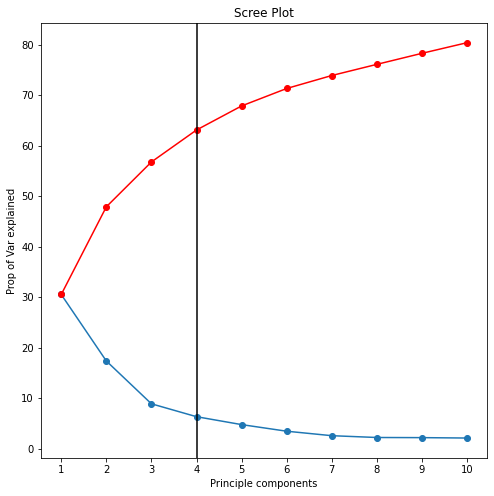

In [301]:
#Scree plot
exp_var = f_results.explained_variance_ratio_*100
cum_var = np.cumsum(f_results.explained_variance_ratio_*100)

plt.figure(figsize = (8,8))
plt.plot(np.arange(1,11), exp_var, 'o-')
plt.plot(np.arange(1,11), cum_var, 'ro-')
plt.xlabel('Principle components')
plt.ylabel('Prop of Var explained')
plt.title('Scree Plot')
plt.xticks(np.arange(1,11))
plt.axvline(x = 4, color = 'black');

In [302]:
print('The % of variance explained by 4 PCs is', round(cum_var[3]))

The % of variance explained by 4 PCs is 63


In [303]:
#PC1 loadings 
pd.set_option('display.max_rows', pc_loadings.shape[0]+1)
pd.DataFrame(pc_loadings['PC_1'].sort_values(ascending = False))

,PC_1
touches,0.200744
total_losses_of_possession,0.187658
total_passes,0.184299
open_play_passes,0.183944
successful_passes_opposition_half,0.178691
unsuccessful_passes_opposition_half,0.177415
total_successful_passes_excl_crosses_corners,0.174615
successful_short_passes,0.174020
successful_open_play_passes,0.173961
ground_duels_won,0.169644


In [304]:
#Majority of loadings are positive, the few negative ones have low magnitude, less significant for 1st principle component
#Majority of significant (higher magnitude) variables in 1st PC related to the passing abilities of the forwards 
#The 1st PC represents the passings abilities/factor of the players
#Forwards with high positive PC1 score are more of a wingers, players who create more chances rather than being the main goalscores
#Setting up of goals, delivering crosses/passes insdie boxes. 

#Players with negative scores describe players who do not touch the ball more or provide passes. These are more of traditional strikers
#whose are only focused about scoring. They relied of players to feed them ball to score

In [305]:
pd.DataFrame(pc_loadings['PC_2'].sort_values(ascending = False))

,PC_2
headed_goals,2.088830e-01
total_shots,2.059812e-01
aerial_duels,2.058056e-01
aerial_duels_won,2.038226e-01
shots_on_target_inc_goals,2.027268e-01
goals,2.010078e-01
aerial_duels_lost,1.991434e-01
height,1.916762e-01
offsides,1.902248e-01
unsuccessful_layoffs,1.889084e-01


In [306]:
#The loadings for PC2 are almost evenly distributed across the sign
#The significant positive loadings (high absolute values) are focused on the goal scoring abilites of the forwards
#in terms of shots taken, shots on target, goals scored via head/foot. The height factor is also invovled providing added advantage
#to the forwards.
#The -ve loadings for PC2 represent inefficiencies/carelesses of players in terms of creating the attacks.
#Forwards with high pc2 score represent goal hunters, while negative ones are those with inefficient in terms of launching attacks

In [307]:
pd.DataFrame(pc_loadings['PC_3'].sort_values(ascending = False))

,PC_3
penalties_taken,2.231000e-01
penalty_goals,2.146321e-01
left_foot_goals,1.958238e-01
home_goals,1.924517e-01
winning_goal,1.833861e-01
goals,1.784710e-01
goal_assists,1.665258e-01
successful_corners_into_box,1.637126e-01
through_balls,1.609836e-01
assists_intentional,1.602968e-01


In [308]:
#The loadings are again evenly distributed across the signs
#The significant +ve laodings (higher absolute valeus) represent forwards who are involved in goals, in both goals scored and assists
#provided,  etc. More of a complete type of attackers
#While the -ve loadings represent the physical nature of forwards, those are are more involved in duels, fighting for the balls
#pressing forward continuously to win balls, ball winning forwards. Thier main job is to win balls
#Scores represent the same stuff describe above

In [309]:
pd.DataFrame(pc_loadings['PC_4'].sort_values(ascending = False))

,PC_4
unsuccessful_dribbles,2.688277e-01
overruns,2.643609e-01
successful_dribbles,2.554920e-01
corners_won,1.941105e-01
total_touches_in_opposition_box,1.544056e-01
goal_assists,1.405398e-01
goals_from_outside_box,1.344406e-01
assists_intentional,1.326924e-01
successful_crosses_open_play,1.244099e-01
ground_duels,1.207857e-01


In [310]:
#The loadings are evenly distributed across the signs
#The significant +ve loadings (higher absolute valeus) represent forwards who are good dribblers and advance playmakers and/or inverted playmakers
#while the -ve loadings are poor play makers, playing mostly in there own half

In [311]:
#computing pc scores
scores = pca_forwards.fit_transform(forward_analysis)

In [312]:
scores = pd.DataFrame(scores[:,0:4], index = f_index, columns = ['PC1score', 'PC2score', 'PC3score' , 'PC4score'])
scores.head()

,PC1score,PC2score,PC3score,PC4score
name,,,,
Abdón Prats,-6.348739,0.705055,0.430357,-0.952419
Adri Embarba,7.987098,-3.293570,-1.818260,0.363860
Aimar Oroz,3.343305,-1.719399,-1.376995,-3.861937
Aitor Ruibal,-3.365237,-5.225690,-0.789378,-1.243109
Alex Berenguer,0.639867,-2.308488,1.022473,1.158971


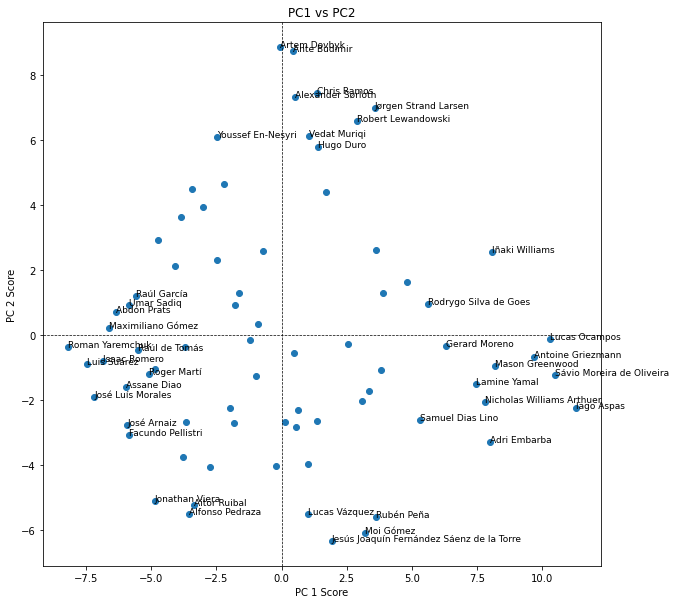

In [313]:
#Plotting PC1 vs PC2
xvar = scores['PC1score']
yvar = scores['PC2score']

fig, ax = plt.subplots(figsize = (10,10))

# Scatter plot using plot()
ax.scatter(xvar, yvar)  # 'ko' represents black dots

# Add labels using text()
for i, label in enumerate(f_index):
    if abs(xvar[i]) > 5 or abs(yvar[i]) > 5:
        ax.text(xvar[i], yvar[i], label, fontsize = 9)

ax.axhline(0, color = 'black', linewidth = 0.7, linestyle='--')  # Horizontal line at y=0
ax.axvline(0, color = 'black', linewidth = 0.7, linestyle='--') 
plt.xlabel('PC 1 Score')
plt.ylabel('PC 2 Score')
plt.title('PC1 vs PC2')
plt.show()

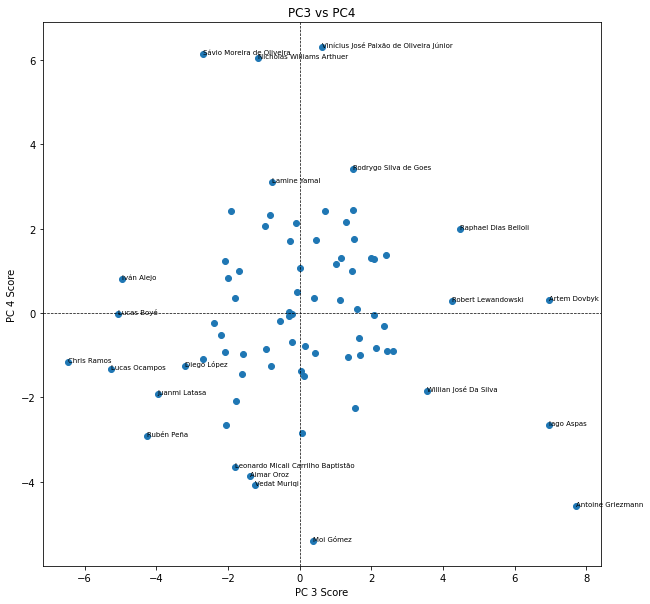

In [314]:
#Plotting PC3 vs PC4
xvar = scores['PC3score']
yvar = scores['PC4score']

fig, ax = plt.subplots(figsize = (10,10))

# Scatter plot using plot()
ax.scatter(xvar, yvar)  # 'ko' represents black dots

# Add labels using text()
for i, label in enumerate(f_index):
       if abs(xvar[i]) > 3 or abs(yvar[i]) > 3:
        ax.text(xvar[i], yvar[i], label, fontsize = 7)

ax.axhline(0, color = 'black', linewidth = 0.7, linestyle='--')  # Horizontal line at y=0
ax.axvline(0, color = 'black', linewidth = 0.7, linestyle='--') 
plt.xlabel('PC 3 Score')
plt.ylabel('PC 4 Score')
plt.title('PC3 vs PC4')
plt.show()

In [315]:
#Aggregating attacking performace across the teams 

In [316]:
forward = forward.set_index('name')
scores['team'] = scores.index.map(forward['team'])

scores['time_played'] = scores.index.map(forward['time_played'])
scores.head()

,PC1score,PC2score,PC3score,PC4score,team,time_played
name,,,,,,
Abdón Prats,-6.348739,0.705055,0.430357,-0.952419,RCD Mallorca,1258.0
Adri Embarba,7.987098,-3.293570,-1.818260,0.363860,UD Almería,2485.0
Aimar Oroz,3.343305,-1.719399,-1.376995,-3.861937,CA Osasuna,2351.0
Aitor Ruibal,-3.365237,-5.225690,-0.789378,-1.243109,Real Betis,1015.0
Alex Berenguer,0.639867,-2.308488,1.022473,1.158971,Athletic Club,1580.0


In [317]:
#Define weighted average function
def weighted_avg(team, val):
    score = team[val]
    weight = team['time_played']
    
    return (score*weight).sum()/weight.sum()

In [318]:
teams = pd.DataFrame()
#for col in scores.columns[0:4]:
    
   # results = pd.DataFrame(scores.groupby('team').apply(weighted_avg, val = col),reset_index(name = f'{col}')
   # results.set_index('team', inplace=True)
   # teams = pd.concat([teams, results], axis=1)
for col in scores.columns[0:4]:  # Adjust range based on your actual columns
    # Calculate weighted average for each column
    results = scores.groupby('team').apply(weighted_avg, val=col).reset_index(name=f'{col}')
    
    # Set index and concatenate results into teams DataFrame
    results.set_index('team', inplace=True)
    teams = pd.concat([teams, results], axis=1)

In [319]:
teams

,PC1score,PC2score,PC3score,PC4score
team,,,,
Athletic Club,5.099139,0.980600,-0.169283,1.913422
Atlético de Madrid,3.758788,0.171284,3.004368,-1.429600
CA Osasuna,0.914003,-1.073280,-0.859411,-2.579734
Cádiz CF,-1.720931,0.894424,-3.705833,-0.661560
Deportivo Alavés,-3.551662,1.431104,-0.839306,0.803977
FC Barcelona,3.429424,1.315655,2.055068,1.526035
Getafe CF,1.355727,1.264870,-0.344569,-0.398008
Girona FC,4.906692,1.991115,1.960469,2.427438
Granada CF,0.545070,0.782492,-3.471881,0.676026


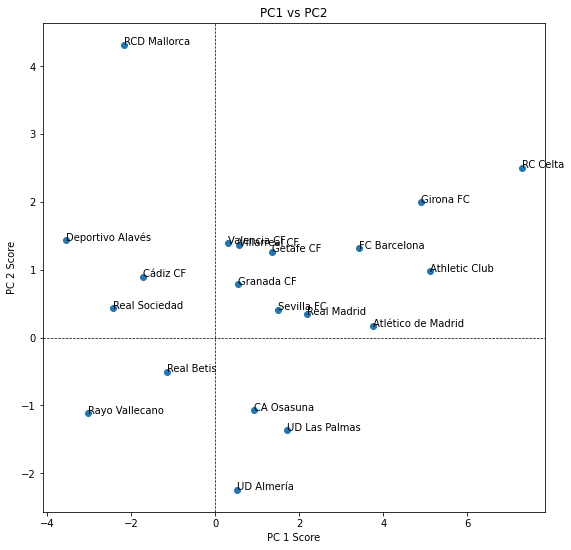

In [320]:
#Plotting PC1 vs PC2
xvar = teams['PC1score']
yvar = teams['PC2score']
team_index = teams.index
fig, ax = plt.subplots(figsize = (9,9))

# Scatter plot using plot()
ax.scatter(xvar, yvar)  # 'ko' represents black dots

# Add labels using text()
for i, label in enumerate(team_index):
        ax.text(xvar[i], yvar[i], label, fontsize = 10)

ax.axhline(0, color = 'black', linewidth = 0.7, linestyle='--')  # Horizontal line at y=0
ax.axvline(0, color = 'black', linewidth = 0.7, linestyle='--') 
plt.xlabel('PC 1 Score')
plt.ylabel('PC 2 Score')
plt.title('PC1 vs PC2')
plt.show()

Similarly we can plot PC3 vs PC4 and other plots

We can do similar analysis for Midfielders and Goalkeepers